Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Bishal Khanal"
ID = "st122221"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


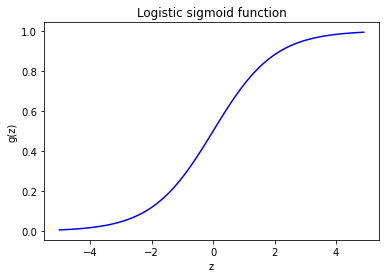

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return 1 / (1 + np.exp( -z ))

z = np.arange(-5, 5, 0.1)
plt.plot(z, f(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j$th iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [3]:

# Load student admissions data. The data file does not contain headers,
# so we use hard coded indices for exam 1, exam2, and the admission decision.

data = np.loadtxt('ex2data1.txt',delimiter = ',')
exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])


Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

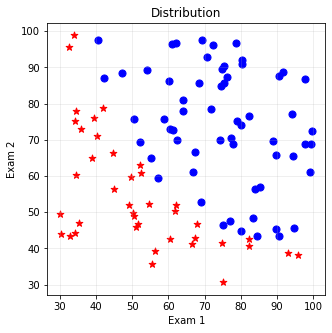

In [4]:
# Plot the data

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()


Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [5]:
import random

# As usual, we fix the seed to eliminate random differences between different runs

random.seed(12)

# Partion data into training and test datasets

m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### Important functions needed later

Let's put all of our important functions here...

In [6]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad


### Initialize theta

In any iterative algorithm, we need an initial guess. Here we'll just use zeros for all parameters.

In [7]:
# Initialize our parameters, and use them to make some predictions

theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])


Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Training function

Here's a function to do batch training for `num_iters` iterations.

In [8]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history


### Do the training

Here we run the training function for a million batches!

In [9]:
# Train for 1000000 iterations on full training set

alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900035


### Plot the loss curve

Next let's plot the loss curve (loss as a function of iteration).

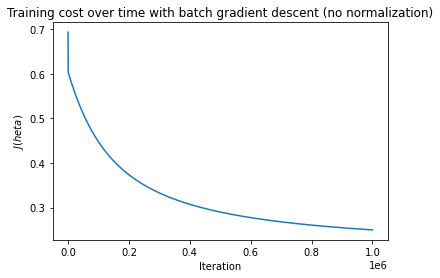

In [10]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from Example 1 (Total 35 points)

That took a long time, right?

We'll see if we can do better. We will try the following:

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the loss curve to compare your results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Be sure to plot loss curves to compare the results with unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Do this work in the following steps.


### Exercise 1.1 (5 points)

Fill in two different values for $\alpha$ and $\theta$.

Use variable names `alpha1`, `alpha2`, `theta_initial1`, and `theta_initial2`.

In [11]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE
# declare your alphas
alpha1 = 0.0005
alpha2 = 0.001

# initialize thetas as you want
theta_initial1 = np.array([[.2],[.2],[.2]])
theta_initial2 = np.array([[-.2],[-.2],[-.2]])

# define your num iterations
num_iters = 100000

In [12]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.0005
alpha 2: 0.001
theta 1: [[0.2]
 [0.2]
 [0.2]]
theta 2: [[-0.2]
 [-0.2]
 [-0.2]]
Use num iterations: 100000
success!


### Exercise 1.2 (5 points)

Fill in the code required to train your model on a particular $\alpha$ and $\theta$:

In [13]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)

In [14]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Write code to plot loss curves for each of the sequences in `j_history_list` from the previous exercise:

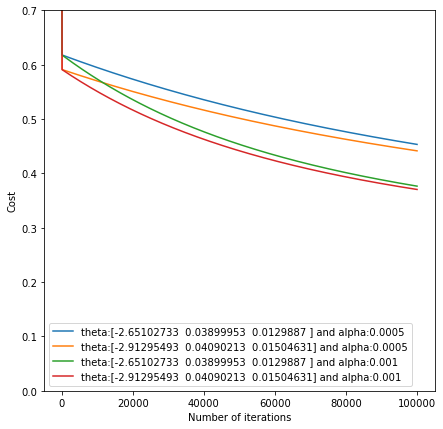

In [15]:
plt.figure(figsize=(7,7))
xaxis = np.arange(len(j_history_list[0]))
plt.plot(xaxis, j_history_list[0], label = "theta:"+ str(theta_list[0].flatten())+" and alpha:"+str(alpha_list[0]))
plt.plot(xaxis, j_history_list[1], label = "theta:"+ str(theta_list[1].flatten())+" and alpha:"+str(alpha_list[0]))
plt.plot(xaxis, j_history_list[2], label = "theta:"+ str(theta_list[0].flatten())+" and alpha:"+str(alpha_list[1]))
plt.plot(xaxis, j_history_list[3], label = "theta:"+ str(theta_list[1].flatten())+" and alpha:"+str(alpha_list[1]))
plt.ylim(0,0.7)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Exercise 1.4 (10 points)

- Repeat your training, but **normalize** your data before training
- Compare the results between normalized data and unnormalized data

In [16]:
# code here
Xnorm = (X - np.amin(X, axis=0)) / (np.amax(X, axis=0) - np.amin(X, axis=0))
Xnorm = np.insert(Xnorm, 0, 1, axis=1)

X_train_n = Xnorm[train_idx,:];
X_test_n = Xnorm[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

j_history_list_n = []
theta_list_n = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        theta_i, j_history_i = train(X_train_n, y_train, theta_initial, alpha, num_iters)
        j_history_list_n.append(j_history_i)
        theta_list_n.append(theta_i)



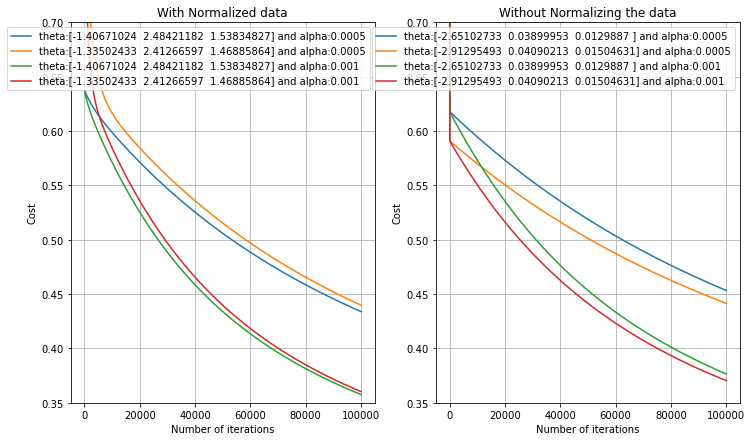

In [17]:

xaxis = np.arange(len(j_history_list[0]))
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,7))
ax0.plot(xaxis, j_history_list_n[0], label = "theta:"+ str(theta_list_n[0].flatten())+" and alpha:"+str(alpha_list[0]))
ax0.plot(xaxis, j_history_list_n[1], label = "theta:"+ str(theta_list_n[1].flatten())+" and alpha:"+str(alpha_list[0]))
ax0.plot(xaxis, j_history_list_n[2], label = "theta:"+ str(theta_list_n[0].flatten())+" and alpha:"+str(alpha_list[1]))
ax0.plot(xaxis, j_history_list_n[3], label = "theta:"+ str(theta_list_n[1].flatten())+" and alpha:"+str(alpha_list[1]))
ax0.set_ylim(0.35,0.7)
ax0.set_title('With Normalized data')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

ax1.plot(xaxis, j_history_list[0], label = "theta:"+ str(theta_list[0].flatten())+" and alpha:"+str(alpha_list[0]))
ax1.plot(xaxis, j_history_list[1], label = "theta:"+ str(theta_list[1].flatten())+" and alpha:"+str(alpha_list[0]))
ax1.plot(xaxis, j_history_list[2], label = "theta:"+ str(theta_list[0].flatten())+" and alpha:"+str(alpha_list[1]))
ax1.plot(xaxis, j_history_list[3], label = "theta:"+ str(theta_list[1].flatten())+" and alpha:"+str(alpha_list[1]))
ax1.set_ylim(0.35,0.7)
ax1.set_title('Without Normalizing the data')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.grid('on')
ax1.legend()

plt.show()

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Write your discussion here.

#### **Discussion**

In raw data (without normalization), the value of alpha (learning rate) needs to be set very small in order to avoid the divide by zero error because of the logarithmic function, which is because of the rounding error (because of floating number bits and precision), since the sigmoid function outputs 1 or 0 only when the input value tends to infinity or -ve infinity. And there is restriction in setting the intial value of theta because of that issue. So I chose the theta nearly equal to each other, without being able to choose randomly.

From the plot of both normalized and raw data we can see that there is effect in the intial theta values. Choosing the appropriate initial value theta enables faster convergence as seen in the figure, which after a lot of iterations starts overlapping.

The effect of learning rate seems significant. Higher the value of learning rate, faster is the convergence, meaning model learns faster with higher learning rate. But if the learning rate is too high, then the model might not converge to optimum parameters instead may become worse and worse, causing unstablity in learning process. Hence the different values of learning rate must be tested for a model and check if the model converges faster. Common values of alpha are that the machine learning community tries are in this order: 0.0003,0.003,0.03. But this might be different for different model.

Now comparing the difference in learning curve when the training data is raw and normalized:
From the figure above, it seems like the model trained with normalized training data converges faster at the particular number of iterations. In the figure above, the difference is more significant when the learning rate is high.

Another big difference is seen in the optimized theta values. The optimized theta values for the model trained on raw dataset is nearly [-2.91,0.04,0.015] and the other model is nearly [-1.33, 2.41, 1.46]. This shows that the information is stored more in the bias parameters for the model trained on raw data, while in the other case it seems to be distributed over each parameters equally. I don't know if this make this huge impact on the model perfomance but we will know their performance once we test these models with unseen test datasets.

Since because of the raw data, I was not able to choose random intial theta. Now I am going to use normalized training sets to train the model and see the effect of initial thetas effect on the training curve.

In [18]:
alpha1 = 0.03
alpha2 = 0.003
alpha_list = [alpha1, alpha2]

# initialize thetas as you want
theta_initial1 = np.array([[4],[-8],[12]])
theta_initial2 = np.array([[-1],[1],[0]])
theta_initial_list = [theta_initial1, theta_initial2]

# define your num iterations
num_iters = 100000

j_history_list_n2 = []
theta_list_n2 = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        theta_i, j_history_i = train(X_train_n, y_train, theta_initial, alpha, num_iters)
        j_history_list_n2.append(j_history_i)
        theta_list_n2.append(theta_i)



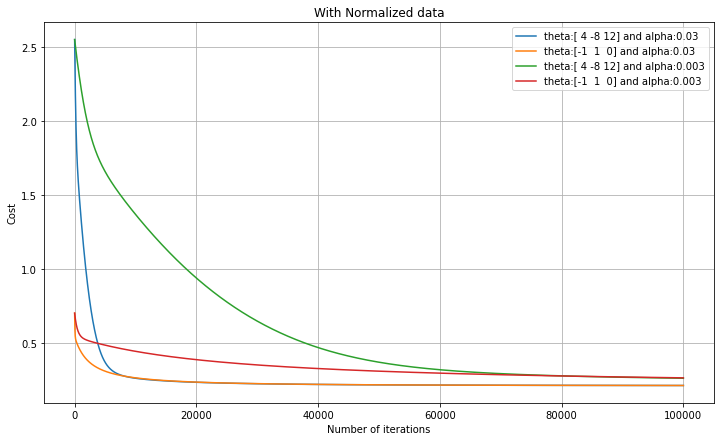

In [19]:
xaxis = np.arange(len(j_history_list_n2[0]))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
ax0.plot(xaxis, j_history_list_n2[0], label = "theta:"+ str(theta_initial_list[0].flatten())+" and alpha:"+str(alpha_list[0]))
ax0.plot(xaxis, j_history_list_n2[1], label = "theta:"+ str(theta_initial_list[1].flatten())+" and alpha:"+str(alpha_list[0]))
ax0.plot(xaxis, j_history_list_n2[2], label = "theta:"+ str(theta_initial_list[0].flatten())+" and alpha:"+str(alpha_list[1]))
ax0.plot(xaxis, j_history_list_n2[3], label = "theta:"+ str(theta_initial_list[1].flatten())+" and alpha:"+str(alpha_list[1]))
# ax0.set_ylim(0.35,0.7)
ax0.set_title('With Normalized data')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

For a given learning rate, it seems like that the effect of initial value of theta is significant when the number of iterations is which is below 9000 for learning rate=0.03 and for 0.003 is below 60,000. After certain number of iterations whatever the initial theta is, their learning curves **overlap** with each other.
**So, for better results at lesser number of iterations or at starting iterations of model training, we have to choose proper initial value of learning parameters. The effect of initial theta is significant only when the learning rate is too small.**

Now, for a given initial theta, more the learning rate the faster is the convergence, as shown in the above figure. In figure, the blue curve and green curve are the learning curve plot with same initial theta. The blue curve converged at 10000 iterations while the green curve converged at 60,000 iterations.
**So for faster model training and better results at lesser number of iterations, appropriate learning rate should be chosen.**

**Now lets see what happens when we chose too much higher learning rate:**

In [20]:
alpha = 20

theta_initial = np.array([[4],[-8],[12]])

# define your num iterations
num_iters = 200

theta_optimum, cost_periter = train(X_train_n, y_train, theta_initial, alpha, num_iters)



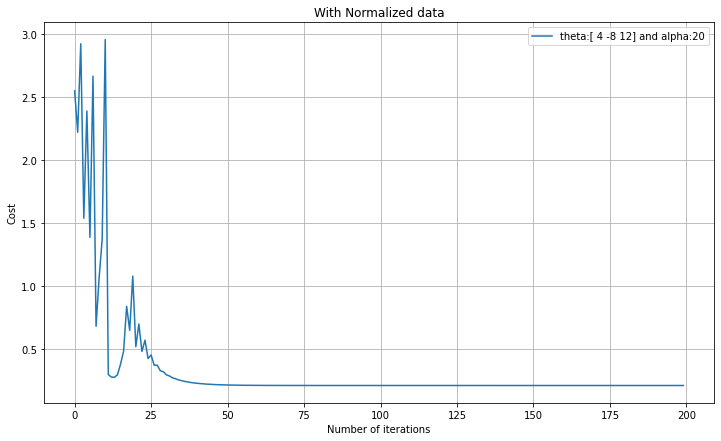

In [21]:
xaxis = np.arange(len(cost_periter))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
ax0.plot(xaxis, cost_periter, label = "theta:"+ str(theta_initial.flatten())+" and alpha:"+str(alpha))

# ax0.set_ylim(0.2,0.3)
ax0.set_title('With Normalized data')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

**I am surprised that there is not much effect of setting the learning rate as high as 20 (or may be even more), still the model is converging well, with even smaller training cost. The model is converging in few iterations.**

**But when I plot the graph at lower number of iterations, we can see some overshoot at the beginning and then it settles down after 50 iterations.**

### The logistic regression decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [22]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

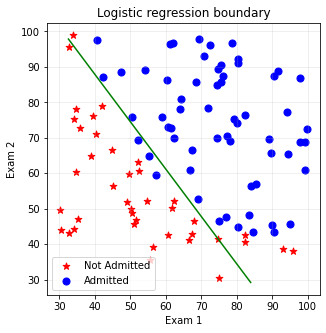

In [23]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


You may have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [24]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [25]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.6636, hard R^2 0.6931, accuracy 0.93


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look at it

In [26]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd
import numpy as np

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

# print('Training data:\n', data_train)
data_train.head()

Training data shape (614, 13)
Test data shape (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [28]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Let's complete the data processing based on examples given and logistic regression model on training dataset. Then we'll get the model's accuracy (goodness of fit) on the test dataset.

Here is another example of filling in missing values for the `Dependents` (number of children and other dependents)
attribute. We see that categorical values are all numeric except one value "3+"
Let's create a new category value "4" for "3+" and ensure that all the data is numeric:

In [29]:

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [30]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Set up $\mathbf{x}$ and $y$ data (10 points)
- Train a logistic regression model and return the values of $\theta$ and $J$ you obtained. Find the best $\alpha$ you can; you may find it best to normalize before training. (30 points)
- Using the best model parameters $\theta$ you can find, run on the test set and get the model's accuracy. (10 points)
- Summarize what you did to find the best results in this take home exercise. (15 points)

## To turn in

Turn in this Jupyter notebook with your solutions to he exercises and your experiment reports,
both for the in-lab exercise and the take-home exercise. Be sure you've discussed what
you learned in terms of normalization and data cleaning and the results
you obtained.


In [31]:
print(data_train.isna().sum())
print('\n',data_train.dtypes)

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [32]:
print(data_train['Gender'].value_counts())
print('\ntotal', data_train['Gender'].value_counts().sum())

total_male = data_train['Gender'].value_counts().Male
total_female = data_train['Gender'].value_counts().Female
total = data_train['Gender'].value_counts().sum()

total_na_train = data_train['Gender'].isna().sum()

na_male = int(np.round(total_male/total * total_na_train))
na_female = int(np.round(total_female/total * total_na_train))

print(na_male,na_female, total_na_train)

data_train['Gender'].fillna('Male', inplace=True, limit=na_male)
data_train['Gender'].fillna('Female', inplace=True, limit=na_female)

print(data_train['Gender'].isna().sum())


Male      489
Female    112
Name: Gender, dtype: int64

total 601
11 2 13
0


In [33]:
print(data_test['Gender'].isna().sum())

total_na_test = data_test['Gender'].isna().sum()

na_male = int(np.round(total_male/total * total_na_test))
na_female = int(np.round(total_female/total * total_na_test))

print(na_male,na_female, total_na_test)

data_test['Gender'].fillna('Male', inplace=True, limit=na_male)
data_test['Gender'].fillna('Female', inplace=True, limit=na_female)

print(data_test['Gender'].isna().sum())

11
9 2 11
0


In [34]:
print(data_train.isna().sum())
print(data_test.isna().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [35]:
print(data_train['Self_Employed'].isna().sum())
print(data_train['Self_Employed'].value_counts())

total_yes = data_train['Self_Employed'].value_counts().Yes
total_no = data_train['Self_Employed'].value_counts().No
total_na = data_train['Self_Employed'].isna().sum()

print(total_yes, total_no, total_na)

na_yes = int(np.round( total_yes/(total_yes + total_no) * total_na ))
na_no = int(np.round( total_no/(total_yes + total_no) * total_na ))

data_train['Self_Employed'].fillna('Yes', inplace=True, limit = na_yes)
data_train['Self_Employed'].fillna('No', inplace=True, limit = na_no)

print(data_train['Self_Employed'].isna().sum())

32
No     500
Yes     82
Name: Self_Employed, dtype: int64
82 500 32
0


In [36]:
total_na = data_test['Self_Employed'].isna().sum()

na_yes = int(np.round( total_yes/(total_yes + total_no) * total_na ))
na_no = int(np.round( total_no/(total_yes + total_no) * total_na ))

data_test['Self_Employed'].fillna('Yes', inplace=True, limit = na_yes)
data_test['Self_Employed'].fillna('No', inplace=True, limit = na_no)

print(data_test['Self_Employed'].isna().sum())
print(data_test['Self_Employed'].value_counts())

0
No     327
Yes     40
Name: Self_Employed, dtype: int64


data_train.isna().sum()

In [37]:
#the purpose of using mean to fillna is to not change the mean of the overall data
mean_lat = data_train['Loan_Amount_Term'].sum()/data_train['Loan_Amount_Term'].value_counts().sum() #total_sum/(total_count excluding na)
lat_na = data_train['Loan_Amount_Term'].isna().sum()
print('mean of loan amount term:', mean_lat,'\nTotal na:', lat_na)

data_train['Loan_Amount_Term'].fillna(mean_lat, inplace=True, limit=lat_na)

print(data_train['Loan_Amount_Term'].isna().sum())

mean of loan amount term: 342.0 
Total na: 14
0


In [38]:
print('new mean of loan amount term:',data_train['Loan_Amount_Term'].sum()/data_train.shape[0])

new mean of loan amount term: 342.0


In [39]:
#Filling NA of LOAN AMOUNT TERM for test data, using the value of mean of TRAIN data
print(data_test['Loan_Amount_Term'].isna().sum())

data_test['Loan_Amount_Term'].fillna(mean_lat, inplace=True, limit=lat_na)

print(data_test['Loan_Amount_Term'].isna().sum())


6
0


In [40]:
data_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#though credit_history column contains float data type, I am not calculating mean to fill the na term
#the values in that column is either 0 or 1, so it means there is only two possible value either 1 or 0
#hence i am going to treat this column like the categorical ones
print(data_train['Credit_History'].isna().sum())

print(data_train['Credit_History'].value_counts())
total_ones = data_train['Credit_History'].value_counts().loc[1]
total_zeros = data_train['Credit_History'].value_counts().loc[0]
total = total_ones + total_zeros

total_na = data_train['Credit_History'].isna().sum()

nafill_ones = int(np.round(total_ones / total * total_na))
nafill_zeros = total_na - nafill_ones

data_train['Credit_History'].fillna(1.0, inplace = True, limit = nafill_ones)
data_train['Credit_History'].fillna(0.0, inplace = True, limit = nafill_zeros)

print(data_train['Credit_History'].isna().sum())

50
1.0    475
0.0     89
Name: Credit_History, dtype: int64
0


In [42]:
#filling na for Test dataset for Credit_History column, using the ratio of ones and zeros from the training dataset

print(data_test['Credit_History'].isna().sum())

total_na = data_test['Credit_History'].isna().sum()

nafill_ones = int(np.round(total_ones / total * total_na))
nafill_zeros = total_na - nafill_ones

data_test['Credit_History'].fillna(1.0, inplace = True, limit = nafill_ones)
data_test['Credit_History'].fillna(0.0, inplace = True, limit = nafill_zeros)

print(data_test['Credit_History'].isna().sum())

29
0


In [43]:
#finished filling every na term

print(data_train.isna().sum())
print(data_test.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Now, its time to replace categorical values to numerical values. In our datasets, the columns with categorical values contains only two types of values. For example: Gender column has two values- Male and Female, similarly, Self_Employed column has two values- Yes and No.

There is one popular method, called Hot encoding, to convert such categorical values to the numerical values. Another simple method that I know is replacing the categorical object values with unique numeric values such as 0, 1, 2 if there are three unique object in that column. Later method has some inbuilt properties, in our example, 2 is greater than 1 and 0. But sometimes the Categorical values such as monkey, cow, buffalo doesn't have such properties, but replacing such categorical values with numerical values like 0, 1, 2 then it seems like buffalo is greater than monkey and cow, which is not exactly what we meant. So, its better to use Hot encoding method to encode such categorical values.

But in our case, I am going to use later one, because there are only two possible values in such columns in our datasets. So we can represent them with 0 and 1, which, I think, will not create ambiguity as this is just a binary representation of two different objects.

And we have three categories for Property_Area column, which are- Rural, Semiurban, Urban, which inherently has some kind of order, like, Urban is more developed than Semiurban and Rural. Hence, I am going to use 0 for Rural, 1 for Semiurban and 2 for Urban.

In [44]:
print(data_train.columns)
print(data_train['Married'].value_counts())
print(data_train['Gender'].value_counts())
print(data_train['Education'].value_counts())
print(data_train['Self_Employed'].value_counts())
print(data_train['Property_Area'].value_counts())
print(data_train['Loan_Status'].value_counts())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Yes    400
No     214
Name: Married, dtype: int64
Male      500
Female    114
Name: Gender, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     527
Yes     87
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Before doing that, I will convert column with numerical values but set as string. In our case, Dependents is that type of column which contains 0, 1, 2, 4 which is numeric but represented as string '0', '1','2','4'.

In [45]:
print(data_train['Dependents'].value_counts())

0    354
1    104
2    103
4     53
Name: Dependents, dtype: int64


In [46]:
data_train['Dependents'] = data_train['Dependents'].values.astype(int)

In [47]:
data_test['Dependents'] = data_test['Dependents'].values.astype(int)

In [48]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Since Loan_ID doesn't contain information to affect Loan_status, I am not going to use it to train the model. It's like a serial number, which is unique for each row and so can be used for indexing the rows.

In [49]:
data_train['Loan_ID'].head

<bound method NDFrame.head of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>

Now, replacing categorical values of such columns to numerical values

In [50]:
print(data_train.dtypes)
data_train['Gender'].replace({'Male': 1, 'Female':0}, inplace = True)
data_train['Married'].replace({'Yes': 1, 'No':0}, inplace = True)
data_train['Self_Employed'].replace({'Yes': 1, 'No':0}, inplace = True)
data_train['Education'].replace({'Graduate': 1, 'Not Graduate':0}, inplace = True)
data_train['Property_Area'].replace({'Rural': 0, 'Semiurban':1, 'Urban': 2}, inplace = True)
data_train['Loan_Status'].replace({'Y': 1, 'N':0}, inplace = True)



Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [51]:
print(data_train.dtypes)
data_train.head()

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [52]:
print(data_test.dtypes)
data_test['Gender'].replace({'Male': 1, 'Female':0}, inplace = True)
data_test['Married'].replace({'Yes': 1, 'No':0}, inplace = True)
data_test['Self_Employed'].replace({'Yes': 1, 'No':0}, inplace = True)
data_test['Education'].replace({'Graduate': 1, 'Not Graduate':0}, inplace = True)
data_test['Property_Area'].replace({'Rural': 0, 'Semiurban':1, 'Urban': 2}, inplace = True)
# data_test['Loan_Status'].replace({'Y': 1, 'N':0}, inplace = True)

print(data_test.dtypes)
data_test.head()

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


Training model

In [53]:
# data_train.drop(columns = 'Loan_ID', inplace = True)
# data_test.drop(columns = 'Loan_ID', inplace = True)

y_train = data_train['Loan_Status'].to_numpy()
X_train = data_train.drop(columns = ['Loan_Status', 'Loan_ID'], inplace = False).to_numpy() #inplace is False by default though

#normalization
X_train_n = (X_train - np.amin(X_train, axis=0)) / (np.amax(X_train, axis=0) - np.amin(X_train, axis=0))
X_train_n = np.insert(X_train_n, 0, 1, axis = 1)

X_train = np.insert(X_train, 0, 1, axis = 1)


In [54]:
y_train.shape

(614,)

In [55]:
data_train.drop(columns = ['Loan_Status', 'Married']).head()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,LP001003,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,LP001005,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,LP001006,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,LP001008,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [56]:
# y_test = data_test['Loan_Status'].to_numpy()
# X_test = data_test.drop(columns = ['Loan_Status', 'Loan_ID'], inplace = False).to_numpy()


# X_test_n = (X_test - np.amin(X_test, axis=0)) / (np.amax(X_test, axis=0) - np.amin(X_test, axis = 0))
# X_test_n = np.insert(X_test_n, 0, 1, axis=1)
# X_test = np.insert(X_test, 0, 1, axis=1)

In [57]:
def my_train(X, y, theta, alpha, num_iters):
    j_history = []
    for i in range(num_iters):
        ypred = 1 / (1 + np.exp(- (X @ theta.reshape(-1,1)))) #(m,1)
        cost = -1/len(y) * np.sum(y.reshape(-1,1) * np.log(ypred) + (1-y.reshape(-1,1)) * np.log(1 - ypred))
        grad_j = 1/len(y) * (X.T @ (ypred - y.reshape(-1,1))) #(n,1)
        theta = theta.reshape(-1,1) - alpha * grad_j
        j_history.append(cost)
    
    return theta, j_history

alpha_list = [5, 3, 0.3, 0.03, 0.003, 0.0003]            

# initialize thetas as you want
theta_initial = np.zeros((X_train.shape[1],1))

# define your num iterations
num_iters = 10000

j_history_list = []
theta_list_n = []
for alpha in alpha_list:
    theta, j_history = my_train(X_train_n, y_train, theta_initial, alpha, num_iters)
    j_history_list.append(j_history)
    theta_list_n.append(theta)

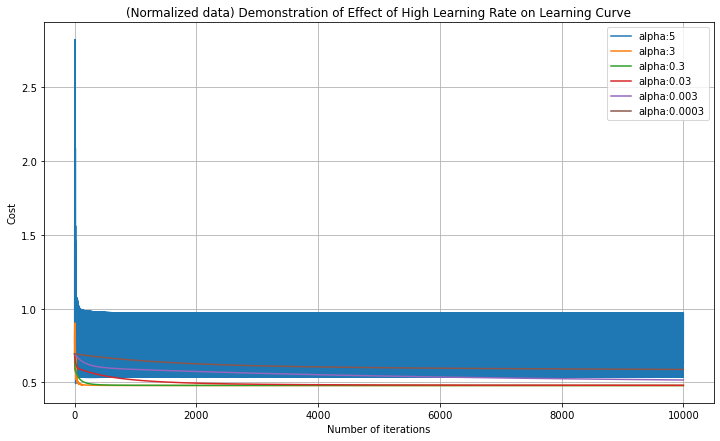

In [58]:
import matplotlib.pyplot as plt

xaxis = np.arange(len(j_history_list[0]))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
for i in range(len(alpha_list)):
    ax0.plot(xaxis, j_history_list[i], label = "alpha:"+str(alpha_list[i]))

# ax0.set_ylim(0.35,0.7)
ax0.set_title('(Normalized data) Demonstration of Effect of High Learning Rate on Learning Curve')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

In [59]:
# print(theta_list[1], '\n\n', theta_list[2], '\n\n', theta_list[3])

As we can see from the above plot that when the learning rate is set to 4 then we can see the fluctuations in the training cost value (or learning curve) with the number of iterations. This shows that if the value of alpha is too high then we can see this never ending unstable training cost value.

Yes, higher value of learning rate helps to converge our model faster, but if its too high then we cannot train the model to get its optimum performance. So we need to start with very small value of theta, typically in the range of 0.0001 or even less and gradually increase its value and see the model behavior in the training process, and based on the learning curve of each learning rate select the proper value of learning rate.

In our dataset, as shown above, learning rate can go upto 3. That's pretty awesome!

From the learning curve, we can choose the learning rate to be either 3 or 0.3 or 0.03 because all of them converges our model to the optimum at nearly 8000 iterations.

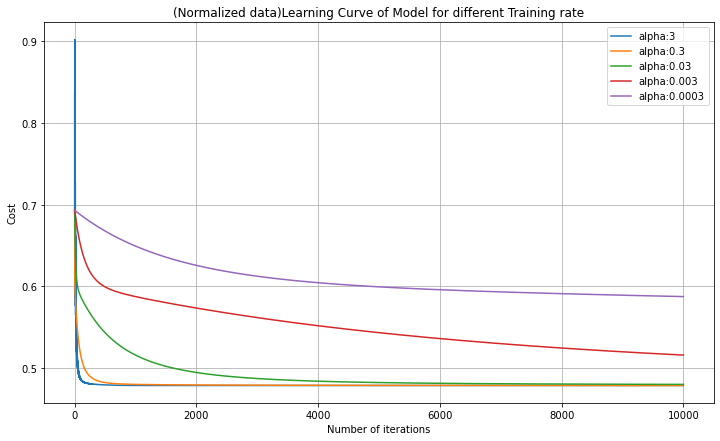

In [60]:
xaxis = np.arange(len(j_history_list[0]))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
for i in range(1,len(alpha_list)):
    ax0.plot(xaxis, j_history_list[i], label = "alpha:"+str(alpha_list[i]))

# ax0.set_ylim(0.35,0.7)
ax0.set_title('(Normalized data)Learning Curve of Model for different Training rate')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

Without Normalization

In [61]:
alpha_list = [0.0000003, 0.00000003, 0.000000003, 0.0000000003, 0.00000000003]            

# initialize thetas as you want
theta_initial = np.zeros((X_train.shape[1],1))

# define your num iterations
num_iters = 10000

j_history_list = []
theta_list = []
for alpha in alpha_list:
    theta, j_history = my_train(X_train, y_train, theta_initial, alpha, num_iters)
    j_history_list.append(j_history)
    theta_list.append(theta)

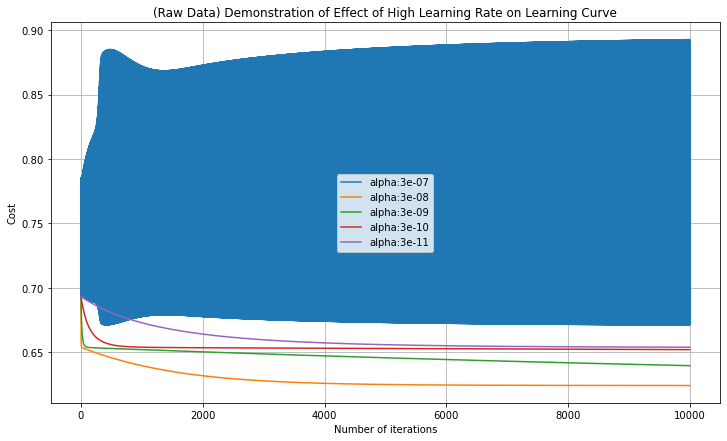

In [62]:
xaxis = np.arange(len(j_history_list[0]))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
for i in range(len(alpha_list)):
    ax0.plot(xaxis, j_history_list[i], label = "alpha:"+str(alpha_list[i]))

# ax0.set_ylim(0.35,0.7)
ax0.set_title('(Raw Data) Demonstration of Effect of High Learning Rate on Learning Curve')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

From above graph we can see that the model doesn't converge to optimum when the learning rate is 3*10^-7. 

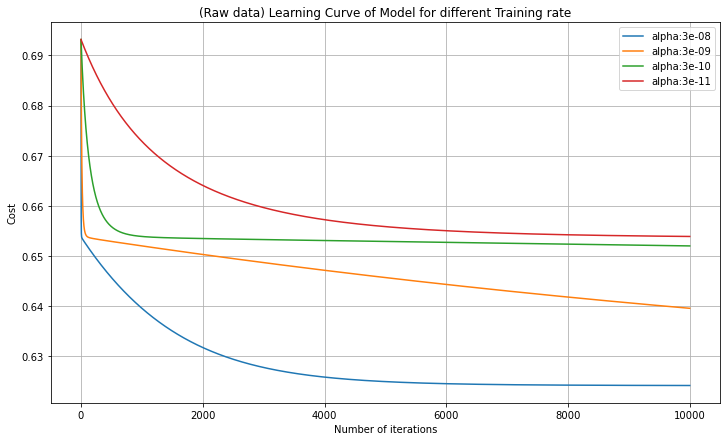

In [63]:
xaxis = np.arange(len(j_history_list[0]))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
for i in range(1,len(alpha_list)):
    ax0.plot(xaxis, j_history_list[i], label = "alpha:"+str(alpha_list[i]))

# ax0.set_ylim(0.35,0.7)
ax0.set_title('(Raw data) Learning Curve of Model for different Training rate')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

For the raw data, the best learning rate for faster convergence for our model will be 3*10^-8.

And comparing this training curve of the model on raw and normalized data we can see that the model trained on normalized data converges better than the model trained on raw data.

Now, I am going to use the normalized data to train the model with learning rate, alpha, equal to 0.3 and this time I will set the number of iterations to the 0.1 million to get the optimum learning parameters.

In [64]:
#MODEL TRAINING USING NORMALIZED DATASETS, LEARNING RATE=0.3
alpha = 0.3          
num_iters = 100000

theta_initial = np.zeros((X_train_n.shape[1],1))

theta, j_history = my_train(X_train_n, y_train, theta_initial, alpha, num_iters)

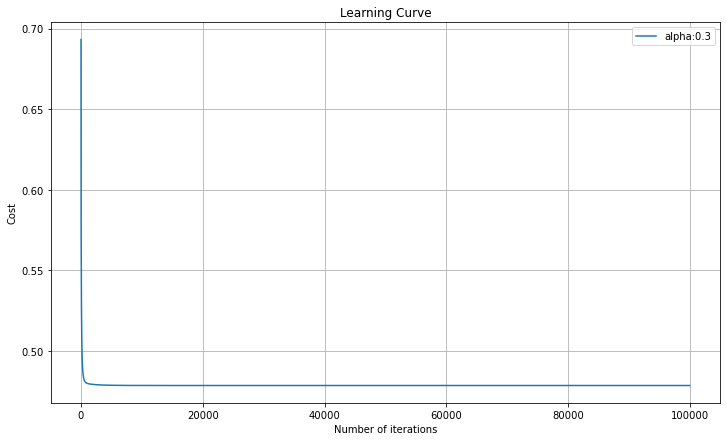

In [65]:
xaxis = np.arange(len(j_history))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
ax0.plot(xaxis, j_history, label = "alpha:"+str(alpha))

# ax0.set_ylim(0.484,0.486)
ax0.set_title('Learning Curve')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

In [66]:
#optimum theta, that I am going to use to test the model
print("Optimum value of theta: ",theta)

Optimum value of theta:  [[-2.06138653]
 [-0.21484045]
 [ 0.61408132]
 [ 0.03950732]
 [ 0.38708885]
 [-0.16911828]
 [ 0.8047015 ]
 [-1.41011495]
 [-1.15722601]
 [-0.3652622 ]
 [ 3.32924642]
 [ 0.15780859]]


In [67]:
X_test = X_test = data_test.drop(columns = [ 'Loan_ID'], inplace = False).to_numpy()


X_test_n = (X_test - np.amin(X_test, axis=0)) / (np.amax(X_test, axis=0) - np.amin(X_test, axis = 0))
X_test_n = np.insert(X_test_n, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [68]:
def h(X, theta):
    ypred = 1 / (1 + np.exp(- (X @ theta.reshape(-1,1))))
    return ypred

In [69]:
y_test_pred_soft = h(X_test_n, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

# test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

# print('accuracy %0.2f' % (test_acc))

In [70]:

loan_id = data_test['Loan_ID'].to_numpy()
test_result = pd.DataFrame(data = {'Loan_ID': loan_id,'Loan_Status': y_test_pred_hard.reshape(-1)})
test_result['Loan_Status'].replace({0: 'N', 1: 'Y'}, inplace=True)
test_result.head()
# print(test_result.shape)


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [71]:
test_result.to_csv('Result.csv', index=False)

In [72]:
df = pd.read_csv('Result.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


**Result and Future Work**

My score for this submission is : 0.7777777777777778, as shown by the this site:
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii, which is very less compared to other submissions in that website.

We can improve this result by filling in N/A term with better values for categorical columns, not just by calculating the ratio of unique objects and filling serially. Similarly, we can use rather better approach to fill numerical columns than directly using the same mean value.

The best approach that came in my mind is that we predict each and every N/A term by training a separate model to fill that particular column. Though we say the training features are independent, they are dependent of each other at some level.

And while representing categorical values with numerical values, what I did was, I used 0 and 1 to replace the objects in the columns containing only two distinct objects. It is okay to use such representation but I think the model performance would be better if I used hot encoding technique to represent such categorical values.

### **Summary of my approach to this problem**

*Filling the n/a part*

For columns with categorical values, the ratio of each unique object is computed and based upon that ratio the n/a part is filled serially. For columns with numerical values, the mean is computed for that non-n/a part and using this mean value the n/a parts are filled, such that the overall mean value of that column remains the same.

In order to fill the test dataset, the data of train dataset is used, since the train datasets contain the larger portion of the datasets. I personally think that it would be better if we have combined both train and test datasets while filling the n/a term for better data distribution knowledge.

*Categorical values to numerical values*

If there are only two unique categories in such columns then they are replace with 0 and 1. Such as if the two unique object of categorical column is 'Yes' and 'No', then the values 'Yes' is replaced with 1 while the values 0 is replaced with 0. In one column there were three categories, Urban, Suburban and Rural. In this case, I replaced Urban with 2, Suburban with 1 and Rural with 0, instead of using hot encoding technique. Because in this particular example, 0,1,2 makes sense with Rural, Suburban and urban in the development terms.

*Normalization*

The normalization of the training datasets seems to converge our model well than the raw datasets. Hence, the normalization of the datasets (independent features) is done before training and testing.

*Model*

Since the output or dependent variable is discrete or categorical with only two classes, logistic regression model is used to compute the hypothesis function.

*Learning Rate, Initial Parameter value and number of iterations*

The learning curve is plotted for different learning rate and the best learning rate is chosen for faster convergence of our model. Training parameters are initialized to zero. The model is trained using Batch gradient descent, where all training datasets are used as a single batch, and looped for 0.1 million times to get the optimum learning paramters.





#### **Splitting test and train sets from the train_loanprediction.csv file, and Training and testing the model using the respective datasets**

In [73]:
import random

# As usual, we fix the seed to eliminate random differences between different runs

random.seed(12)

# Partion data into training and test datasets

m, n = X_train.shape
y_train = y_train.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]

X_test = X_train[test_idx,:]
X_train = X_train[train_idx,:]

X_test_n = X_train_n[test_idx,:]
X_train_n = X_train_n[train_idx,:]

y_test = y_train[test_idx]
y_train = y_train[train_idx]


In [74]:
#MODEL TRAINING USING NORMALIZED DATASETS, LEARNING RATE=0.3
alpha = 0.03          
num_iters = 100000

theta_initial = np.zeros((X_train_n.shape[1],1))

theta, j_history = my_train(X_train_n, y_train, theta_initial, alpha, num_iters)

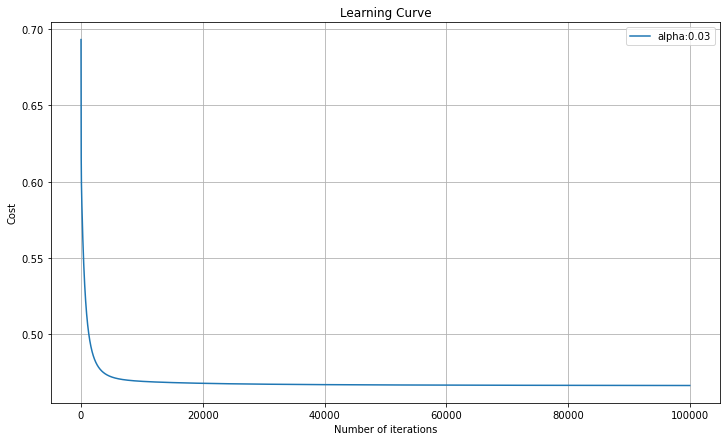

In [75]:
xaxis = np.arange(len(j_history))
fig = plt.figure(figsize=(12,7))
ax0 = plt.axes()
ax0.plot(xaxis, j_history, label = "alpha:"+str(alpha))

# ax0.set_ylim(0.484,0.486)
ax0.set_title('Learning Curve')
ax0.set_xlabel('Number of iterations')
ax0.set_ylabel('Cost')
ax0.grid('on')
ax0.legend()

plt.show()

In [76]:
y_test_pred_soft = h(X_test_n, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('accuracy %0.2f' % (test_acc))

accuracy 0.80


In [77]:
print(y_test.shape, y_train.shape)

(246, 1) (368, 1)


### **Summary**

Hence this show the accuracy to be 0.8. The model is trained using learning rate = 0.03 and iterated over just 100,000 iterations. Here I used the learning rate 0.03 because we have seen from previous learning plots that for normalized datasets the learning rate 0.3, 0.03 is converging our model better and faster.

I used 60% of our datasets to train the model, which is 368 datasets, while 40% datasets is used to test the model, which is 246. This performance can be improved by implementing the filling of N/A using regression rather than just filling up randomly. I have discussed about such improvement techniques in the above discussions.